# Strategy to group Engineering Colleges

You are an independent trainer who would like to pitch your Data Science training program to a set of Engineering colleges. You have data of 26 colleges after survey using questionnaires. Each college has been given a score for 5 performance criteria-Teaching, Fees, Placement, Internship & Infrastructure. Ratings are in the standardized scale of 1 to 5 where 5 has a higher weightage than 1. Segment the colleges into groups and come up with your pitch recommendations for each segment.

# Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Engg_College_Data.csv') 

# Checking the data

In [3]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [4]:
df.shape

(26, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


# Get the count of unique values for Engg_College

In [11]:
len(df.Engg_College.unique())

26

# Get the unique values for Engg_College

In [19]:
df.Engg_College.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

# Checking the Summary Statistic

In [20]:
df.describe() 

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Removing the SR_NO column and storing the result in new object enggdata

In [23]:
enggdata = df.iloc[:,1:]

In [24]:
enggdata.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


# Creating the Dendrogram
### Importing dendrogram and linkage module

In [27]:
!pip install scipy

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Choosing average linkage method

In [50]:
link_method = linkage(enggdata.iloc[:,1:6], method = 'complete')

In [35]:
labelList = np.array(enggdata.Engg_College)
labelList

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

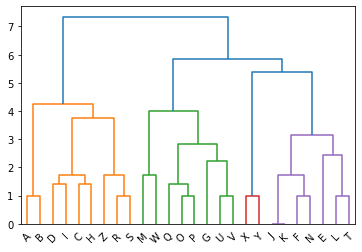

In [51]:
dend = dendrogram(link_method,labels = labelList)

### Cutting the Dendrogram with suitable clusters

# Importing fcluster module to create clusters

In [38]:
from scipy.cluster.hierarchy import fcluster

In [52]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method,3, criterion = "maxclust")


Appending clusters to original dataset

In [53]:
df['clusters'] = clusters

In [54]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,clusters,Agglo_CLusters
0,1,A,5,2,5,5,3,1,0
1,2,B,4,2,5,5,3,1,0
2,3,C,4,5,5,4,5,1,0
3,4,D,5,4,5,4,4,1,0
4,5,E,2,5,2,2,5,3,0


### Cluster Frequency

In [55]:
df.clusters.value_counts().sort_index()

1    9
2    8
3    9
Name: clusters, dtype: int64

# Cluster Profiles

In [56]:
aggdata=df.iloc[:,1:8].groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
clusters,,,,,,
1,3.888889,3.777778,4.666667,3.888889,3.666667,9
2,2.125000,3.125000,1.375000,1.750000,2.000000,8
3,2.333333,3.777778,2.444444,2.555556,4.333333,9


- Cluster 1: Tier 1 colleges (Top Colleges)
- Cluster 2: Tier 3 colleges (Poor performing colleges/new college)
- Cluster 3: Tier 2 colleges (Medium performing colleges)

# Using Agglomerative Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
# Set n_clusters=3,affinity='euclidean', linkage='average' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(enggdata.iloc[:,1:6])
print(Cluster_agglo)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 2 2 0]


Appending clusters to original dataset

In [47]:
df["Agglo_CLusters"]=Cluster_agglo

##### Agglomerative Cluster Frequency

In [48]:
df.Agglo_CLusters.value_counts().sort_index()

0    16
1     8
2     2
Name: Agglo_CLusters, dtype: int64

# Agglomeraive Cluster Profiles

In [49]:
agglo_data=df.drop(["SR_NO","clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
Agglo_CLusters,,,,,,
0,3.375,4.125,3.875,3.4375,3.875,16
1,2.125,3.125,1.375,1.7500,2.000,8
2,1.000,1.000,1.000,1.5000,5.000,2


# Recommendations
1. For companies hiring, go to colleges for Placements are Tier 1 colleges, followed by Tier 2 colleges
2. For companies providing Training program to staffs and students, go to colleges are Tier 2 and Tier 3 Colleges, since Tier 1 is comparitively performing better.
3. Tier 3 colleges will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students
4. Students looking to enroll in a college, can give priority to Tier 1 over Tier 2 and 3 colleges 

# Saving the Cluster Profiles in a csv file

In [ ]:
#aggdata.to_csv('enggdata_hc.csv')